<h2><center> Heuristic Analysis for Project 3 Planning Search</center></h2>

This project is to solve classic PDDL (deterministic logistics planning) problems for an Air Cargo transport system using a planning search agent.

### The problems are: 
1. "Air Cargo Problem 1" is the simplest problem that involves 2 cargos, 2 planes and 2 airports. 
2. "Air Cargo Problem 2" extends problem 1 to 3 cargos, 3 plans and 3 airports
3. "Air Cargo Problem 3" is rather complex and closer to real transport problem. It involves 4 cargos, 2 planes and 4 airports.

### The search algorithms
The search algorithms used in the project are divided into two catagories: generic and with heuristic function.

<b>The generic search algorithms</b>
* Breadth First Search
* Breadth First Tree Search
* Depth First Graph Search
* Depth Limited Search
* Uniform Cost Search

<b>The search algorithms with heuristics</b>
* Recursive Best First Search with <b>h_1</b>
* Greedy Best First Graph Search with <b>h_1</b>
* Astar Search with <b>h_1</b>
* Astar Search with <b>h_ignore_preconditions</b>
* Astar Search with <b>h_pg_levelsum</b>

The heustic functions <strong>h-1</strong> is a do-nothing function.<br>
<code> def h_1(self, node: Node):
        stime = time()
        h_const = 1
        self.run_hfunc_time['h_1'] += time() - stime
        return h_const 
</code>

The heustic functions <strong>h_ignore_precondition</strong> assists search algorithm with simple problem description infomationm.<br>
<code> def h_ignore_preconditions(self, node: Node):
        stime = time()
        count = 0
        kb = PropKB()
        kb.tell(decode_state(node.state, self.state_map).pos_sentence())
        for clause in self.goal:
            if clause not in kb.clauses:
                count += 1
        self.run_hfunc_time["h_ignore_preconditions"] += time() - stime
        return count
</code>

The heustic functions <strong>h_pg_levelsum</strong> utilizes planning to help the search algorithm.<br> 
<code> def h_pg_levelsum(self, node: Node):
        stime = time()
        pg = PlanningGraph(self, node.state)
        pg_levelsum = pg.h_levelsum()
        self.run_hfunc_time["h_pg_levelsum"] += time() - stime
        return pg_levelsum
</code>

### The Tests 

After finished coding, I run the run_search.py for all problem on all searches that did complete. Complete tests may not find solutions. The following table shows the tests of run_search.py. 
* Complete and Optimal means that the test is complete and the solution is an optimal one
* Complete means that the test is complete but the solution is NOT an optimal one
* 'Skip Run' means the run_search.py was not performed on that problem. I sample run all the searches over the all problems 
* 'No Solution' means that the test is complete without solution. 

forehand and skipped tests that could not finish for long period from final run_all scripts.  

<table>
<tr><th>Algorithm</th><th>Heustic Function</th><th>Problem 1</th><th>Problem 2</th><th>Problem 3</th></tr>
<tr><td>Breadth First Search</td><td></td><td>Complete and Optimal</td><td>Complete and Optimal</td><td>Complete and Optimal</td></tr>
<tr><td>Breadth First Tree Search</td><td></td><td>Complete and Optimal</td><td>Skip Run</td><td>Skip Run</td></tr>
<tr><td>Depth First Graph Search</td><td></td><td>Complete</td><td>OK</td><td>OK</td></tr>
<tr><td>Depth Limited Search</td><td></td><td>Complete</td><td>Skip Run</td><td>Skip Run</td>
<tr><td>Uniform Cost Search</td><td></td><td>Complete and OptimalK</td><td>Complete and Optimal</td><td>Complete and Optimal</td></tr>
<tr><td>Recursive Best First Search</td><td>h_1</td><td>Complete and Optimal</td><td>Skip Run</td><td>Skip Run</td>
<tr><td>Greedy Best First Graph Search</td><td>h_1</td><td>Complete and Optimal</td><td>Complete</td><td>Complete</td></tr>
<tr><td>Astar Search</td><td>h_1</td><td>Complete and Optimal</td><td>Complete and Optimal</td><td>Complete and Optimal</td></tr>
<tr><td>Astar Search</td><td>h_ignore_preconditions</td><td>Complete and Optimal</td><td>Complete and Optimal</td><td>Complete and Optimal</td></tr>
<tr><td>Astar Search</td><td>h_pg_levelsum</td><td>Complete and Optimal</td><td>Complete and Optimal</td><td>Complete and Optimal</td></tr>
</table>

The run_all.py executed run_search.py for all finishable tests and collect the results. The following analysis is based on the collected test results.

From the data collected by run_all.py, I exacted the following fields:
* Expansions  
* Goal Tests  
* New Nodes  
* Plan length - the 'No Solution' run will mark as -1  
* Time elapsed in sec

I made a scrip that print the data and plot "Expansions and Goal Tests" and "Time elapsed in sec" for each problem. Also I added code to collect total time the search spend on heuristic function.

The following is a sniplet of collected data:

<code> 
+++ RUN 9: astar_search  cmd=python run_search.py -p 2 -s 10


Solving Air Cargo Problem 2 using astar_search with h_pg_levelsum...
goal_test: FOUND: state= FFFFFFTFFFFTFFFFTFFFFTFTFTF ,kb.clauses= [At(C3, SFO), At(C2, SFO), At(C1, JFK), At(P1, JFK), At(P2, SFO), At(P3, SFO)] , self.goal= [At(C1, JFK), At(C2, SFO), At(C3, SFO)]

Expansions   Goal Tests   New Nodes
    86          88         841    

Plan length: 9  Time elapsed in seconds: 24.300797572831275
Load(C1, P1, SFO)
Fly(P1, SFO, JFK)
Load(C2, P2, JFK)
Fly(P2, JFK, SFO)
Load(C3, P3, ATL)
Fly(P3, ATL, SFO)
Unload(C1, P1, JFK)
Unload(C2, P2, SFO)
Unload(C3, P3, SFO)

<span style="background-color:yellow"> total time spent in h_pg_levelsum in 24.14 sec</span>
#create_graph=490, s_level=(4, 5), a_level=(3, 4)
</code>


----- Problem 1 search results
                                          Expansions  Goal Tests  New Nodes  Plan length  Time elapsed in sec
breadth_first_search                            43.0        56.0      180.0          6.0             0.025529
breadth_first_tree_search                     1458.0      1459.0     5960.0          6.0             0.813191
depth_first_graph_search                        21.0        22.0       84.0         20.0             0.012163
depth_limited_search                           101.0       271.0      414.0         50.0             0.070872
uniform_cost_search                             55.0        57.0      224.0          6.0             0.031812
recursive_best_first_search-with-h_1          4229.0      4230.0    17023.0          6.0             2.421813
greedy_best_first_graph_search-with-h_1          7.0         9.0       28.0          6.0             0.004243
astar_search-with-h_1                           55.0        57.0      224.0          6.0

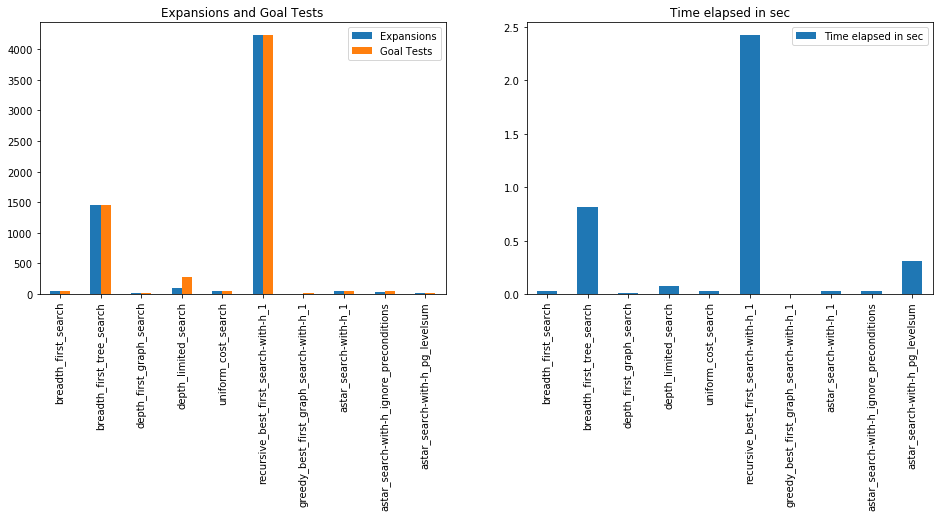


----- Problem 2 search results
                                          Expansions  Goal Tests  New Nodes  Plan length  Time elapsed in sec
breadth_first_search                          3343.0      4609.0    30509.0          9.0             9.519821
depth_first_graph_search                       624.0       625.0     5602.0        619.0             2.418744
uniform_cost_search                           4853.0      4855.0    44041.0          9.0             8.750515
greedy_best_first_graph_search-with-h_1        998.0      1000.0     8982.0         17.0             1.781914
astar_search-with-h_1                         4853.0      4855.0    44041.0          9.0             8.730633
astar_search-with-h_ignore_preconditions      1450.0      1452.0    13303.0          9.0             3.056892
astar_search-with-h_pg_levelsum                 86.0        88.0      841.0          9.0            23.709295


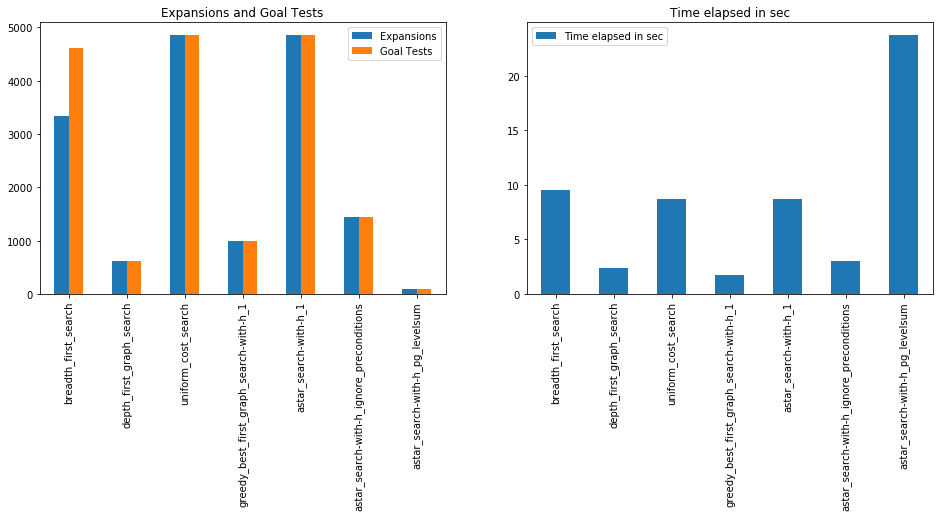


----- Problem 3 search results
                                          Expansions  Goal Tests  New Nodes  Plan length  Time elapsed in sec
breadth_first_search                         14663.0     18098.0   129631.0         12.0            68.947557
depth_first_graph_search                       408.0       409.0     3364.0        392.0             1.233783
uniform_cost_search                          18151.0     18153.0   159038.0         12.0            37.000193
greedy_best_first_graph_search-with-h_1       5398.0      5400.0    47665.0         26.0            11.383848
astar_search-with-h_1                        18151.0     18153.0   159038.0         12.0            37.856847
astar_search-with-h_ignore_preconditions      5038.0      5040.0    44926.0         12.0            11.799383
astar_search-with-h_pg_levelsum                314.0       316.0     2894.0         12.0           113.522877


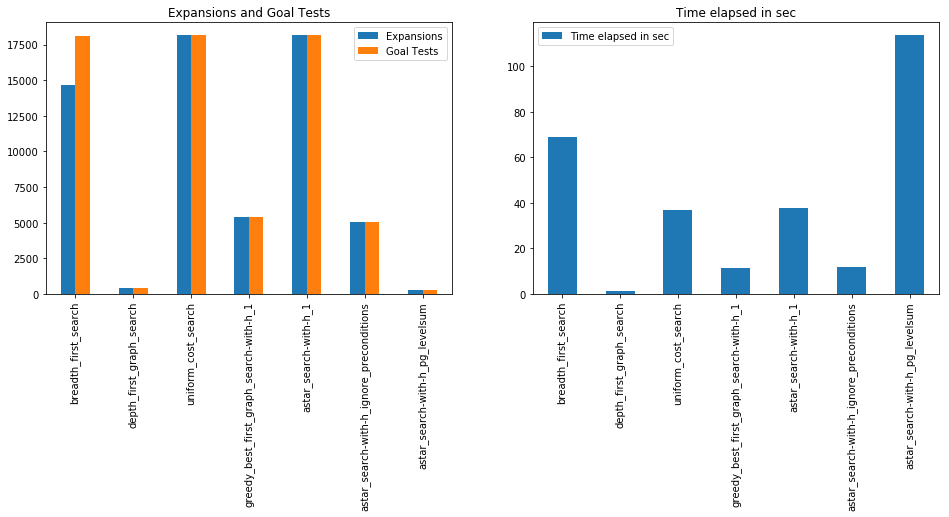

In [7]:
out_data = [get_data(os.path.join(proj_path, fn)) for fn in ['Air_Cargo_Problem_%d.test' % x for x in range(1, 4)]]
names = ['Expansions', 'Goal Tests', 'New Nodes', 'Plan length', 'Time elapsed in sec']
for i in range(3):
    df_index = []
    df_1 = pd.DataFrame()
    for k, v in out_data[i].items():
        df_1[k] = pd.Series(v, index=names)
    df = df_1.transpose()
    print("\n----- Problem %d search results" % (i+1))
    print(df)
    plt.close('all')
    fig, axes = plt.subplots(ncols=2, figsize=(16, 5))
    df[['Expansions', 'Goal Tests']].plot(kind='bar', ax=axes[0]); axes[0].set_title('Expansions and Goal Tests');
    df[['Time elapsed in sec']].plot(kind='bar', ax=axes[1]); axes[1].set_title('Time elapsed in sec');
    plt.show()  



### The Optimal Sequence of Action

<b>Problem 1</b>

<code>
Plan length: 6  Time elapsed in seconds: 0.0036113009436145043
Load(C1, P1, SFO)
Load(C2, P2, JFK)
Fly(P1, SFO, JFK)
Fly(P2, JFK, SFO)
Unload(C1, P1, JFK)
Unload(C2, P2, SFO)
</code>

Other than the algorithm 'depth_limited_search' and 'depth_first_graph_search', all the other algothm found the optimal sequence of actions with the best performer 'greedy_best_first_graph_search with h_1'.

<b>Problem 2</b>

<code>
Plan length: 9  Time elapsed in seconds: 8.033879717737285
Load(C1, P1, SFO)
Load(C2, P2, JFK)
Load(C3, P3, ATL)
Fly(P1, SFO, JFK)
Fly(P2, JFK, SFO)
Fly(P3, ATL, SFO)
Unload(C1, P1, JFK)
Unload(C2, P2, SFO)
Unload(C3, P3, SFO)
</code>

With performmed search, all but depth_first_graph_search have found the optimal sequence of actions.

<b>Problem 3</b>

<code>
Plan length: 12  Time elapsed in seconds: 113.5228772655094
Load(C2, P2, JFK)
Fly(P2, JFK, ORD)
Load(C4, P2, ORD)
Fly(P2, ORD, SFO)
Load(C1, P1, SFO)
Fly(P1, SFO, ATL)
Load(C3, P1, ATL)
Fly(P1, ATL, JFK)
Unload(C1, P1, JFK)
Unload(C2, P2, SFO)
Unload(C3, P1, JFK)
Unload(C4, P2, SFO)

total time spent in h_pg_levelsum in 112.77 sec
</code>

With performmed search, greedy_best_first_graph_search with h_1 and breadth_first_tree_search had NOT found the optimal sequence, the other searches had.

### Analyses
    
* breadth_first_search (BFS) always find solution.
* When depth_first_search (DFS) found a solutio, it may not an optimal solution.
* By dropping all preconditions from actions, we assume every unreached goal could be reach by one step. The heuristic significantly simplified the problem. As a result, astar_search with h_ignore_preconditions is much faster than astar_search with h_1 and astar_search with h_pg_levelsum.    
* While the 'greedy_best_first_graph_search with h_1' algorithm is the top performer for Problem 1 with only 7 expansions, by  increasing the value of problem attributes by 1, case of Problem 2, the number of expansion increased to 998, a <b>142</b> folder increase. In comparison, the expansion of 'astar_search with h_pg_levelsum' the jumped from 11 to 86, a <b>8</b> times increase. 'astar_search with h_pg_levelsum' has significantly reduced node expansion.
* 'greedy_best_first_graph_search with h_1' algorithm does not alway give the optimal solution.
* <b>None</b> of the algorithm found a solution for complex problem Problem 3 before hit the limit imposed by the framework.
* Although 'astar_search with h_pg_levelsum' has the least node expansion, the elapse time is <b>14</b> times longer than 'greedy_best_first_graph_search with h_1'. The test shows that 'astar_search with h_pg_levelsum' spent 24.14 sec in planning code out of 24.30 sec total elapse time - over <b>99%</b> times on heustic function. With fine turning and parallelism, I believe the time spending on heuristic function could be shotened.
* heuristic function 'h_ignore_preconditions' does not reduce node expansion and perform worse than 'h_1' function due to the time in execute the heuristic function. Because 'h_ignore_preconditions' is based on static problem attributes, so it really does not provides more insight than a pure static function 'h_1'. The behavior is consistent from Project 2 heuristic functions I've created and tested.
